# PANDAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from pandas import Series, DataFrame

Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.

In [4]:
ser1=Series([70,8,40,300,1300],index=["France","Suisse","Espagne","USA","Chine"])
ser1["Chine"]

1300

In [5]:
ser1[0]

70

In [6]:
ser1[ser1>50].index

Index(['France', 'USA', 'Chine'], dtype='object')

In [7]:
ser1.name="Populations"
ser1.index.name="Pays"
print(ser1)

Pays
France       70
Suisse        8
Espagne      40
USA         300
Chine      1300
Name: Populations, dtype: int64


In [8]:
#on peut ajouter des séries
ser1+ser1[ser1>100]
ser1.add(ser1[ser1>100],fill_value=0)

Pays
Chine      2600.0
Espagne      40.0
France       70.0
Suisse        8.0
USA         600.0
Name: Populations, dtype: float64

In [9]:
ser1.describe()

count       5.000000
mean      343.600000
std       546.868174
min         8.000000
25%        40.000000
50%        70.000000
75%       300.000000
max      1300.000000
Name: Populations, dtype: float64

Créez un objet Series et ajoutez des dates partant du 3 décembre 2016 par jour jusqu’à aujourd’hui.


In [10]:
import datetime

In [11]:
dates=pd.date_range("2017-01-01",datetime.date.today(),freq="h")
ser2=Series(np.random.randn(len(dates)),index=dates)

In [12]:
ser2.shape

(3553,)

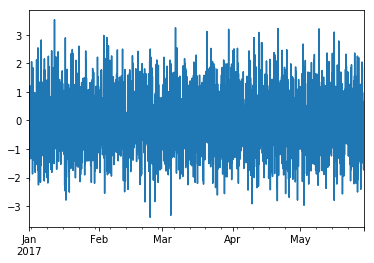

In [13]:
ser2.plot()

In [14]:
months=pd.period_range("2016-01-01",datetime.date.today(),freq="M")

In [15]:
ser2=Series(np.random.randn(months.shape[0]),index=months)

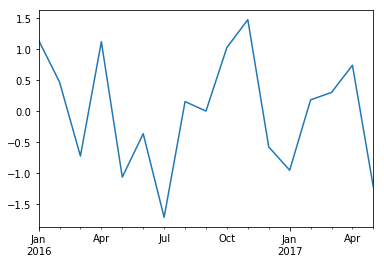

In [61]:
ser2.plot()

Importer en copiant collant les données de wikipédia

In [16]:
import webbrowser
url="https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records"
webbrowser.open(url)

True

In [17]:
frame_nba=pd.read_clipboard()

In [18]:
frame_nba.head()

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,"2,067","1,247",0.624,1976–77,"3,314",Southwest
1,2,Los Angeles Lakers,"3,261","2,190",0.598,1948–49,"5,451",Pacific
2,3,Boston Celtics,"3,274","2,286",0.589,1946–47,"5,560",Atlantic
3,4,Phoenix Suns,"2,146","1,824",0.541,1968–69,"3,970",Pacific
4,5,Oklahoma City Thunder,"2,186","1,866",0.539,1967–68,"4,052",Northwest


In [68]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [69]:
#on affiche les index des colonnes
frame_nba.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Pct.', 'First NBA Season',
       'Total Games', 'Division'],
      dtype='object')

In [19]:
#on corrige les données afin de transformer les str en float
for col in frame_nba.columns:
    if frame_nba[col].dtype==object:
        frame_nba[col]=frame_nba[col].str.replace(",","").astype(float,raise_on_error=False)

In [20]:
frame_nba.describe(include="all")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
count,30.000000,30,30.000000,30.000000,30.000000,30,30.000000,30
unique,NaN,30,NaN,NaN,NaN,15,NaN,6
top,NaN,New Orleans Pelicans,NaN,NaN,NaN,1976–77,NaN,Pacific
freq,NaN,1,NaN,NaN,NaN,4,NaN,5
mean,15.500000,NaN,1893.966667,1884.833333,0.494300,NaN,3778.800000,NaN
std,8.803408,NaN,738.329311,632.328051,0.055334,NaN,1309.153541,NaN
min,1.000000,NaN,562.000000,652.000000,0.391000,NaN,1214.000000,NaN
25%,8.250000,NaN,1413.750000,1395.250000,0.459250,NaN,3067.750000,NaN
50%,15.500000,NaN,2028.500000,1900.000000,0.494500,NaN,3806.000000,NaN
75%,22.750000,NaN,2418.500000,2286.000000,0.521500,NaN,5172.750000,NaN


In [21]:
#on fait un tri en fonction de deux variables
frame_nba.sort_values(["Division","Won"],ascending=[True,False])

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
2,3,Boston Celtics,3274.0,2286.0,0.589,1946–47,5560.0,Atlantic
10,11,Philadelphia 76ers,2754.0,2632.0,0.511,1949–50,5386.0,Atlantic
15,16,New York Knicks,2732.0,2825.0,0.492,1946–47,5557.0,Atlantic
27,28,Brooklyn Nets,1380.0,1934.0,0.416,1976–77,3314.0,Atlantic
24,25,Toronto Raptors,785.0,971.0,0.447,1995–96,1756.0,Atlantic
16,17,Detroit Pistons,2653.0,2797.0,0.487,1948–49,5450.0,Central
7,8,Chicago Bulls,2156.0,1977.0,0.522,1966–67,4133.0,Central
11,12,Milwaukee Bucks,2025.0,1945.0,0.510,1968–69,3970.0,Central
20,21,Cleveland Cavaliers,1779.0,2027.0,0.467,1970–71,3806.0,Central
14,15,Indiana Pacers,1648.0,1665.0,0.497,1976–77,3313.0,Central


In [22]:
frame_nba.corr()

,Rank,Won,Lost,Pct.,Total Games
Rank,1.000000,-0.586385,-0.082124,-0.967006,-0.370373
Won,-0.586385,1.000000,0.823484,0.600994,0.961722
Lost,-0.082124,0.823484,1.000000,0.072293,0.947429
Pct.,-0.967006,0.600994,0.072293,1.000000,0.373863
Total Games,-0.370373,0.961722,0.947429,0.373863,1.000000


Importez des données au format csv

In [23]:
frame_ventes=pd.read_csv("demo_ventes.csv",sep=";",decimal=",",index_col="account")
frame_ventes

,Jan,Feb,Mar
account,,,
211829,10000,62000,35000
320563,95000,45000,35000
648336,91000,120000,35000
109996,45000,120000,10000
121213,162000,120000,35000
132971,150000,120000,35000
145068,62000,120000,70000
205217,145000,95000,35000
209744,70000,95000,35000


Importez un tableau en html depuis la page http://www.fdic.gov/bank/individual/failed/banklist.html 


In [24]:
bank=pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [25]:
nba=pd.read_html("https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records")

In [26]:
type(nba)
len(nba)

7

In [27]:
#on extrait le premier tableau scrappé sur le web
frame_bank=bank[0]

In [28]:
frame_bank

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","May 26, 2017"
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","May 11, 2017"
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","May 23, 2017"
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","May 18, 2017"
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"
5,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
6,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
7,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","April 27, 2017"
8,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
9,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"


Importer des données au format Excel

In [29]:
#1ere approche
frame_excel1=pd.read_excel("excel-data.xlsx",sheetname=0)

In [30]:
#2nde approche
excel=pd.ExcelFile("excel-data.xlsx")

In [31]:
frame_excel2=excel.parse(excel.sheet_names[0])

In [32]:
frame_excel1

,account,name,street,city,state,postal-code
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308


Importez une base SQL

In [34]:
from sqlalchemy import create_engine

In [35]:
engine=create_engine('sqlite:///salaries.sqlite')

In [36]:
engine.table_names()

['Salaries']

In [37]:
frame_salaries=pd.read_sql_query("SELECT * from Salaries", engine)

In [38]:
frame_salaries.shape

(148654, 13)

In [39]:
frame_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [40]:
frame_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [41]:
frame_salaries["TotalPay"].max()

567595.43000000005

In [42]:
frame_salaries["JOB"]=frame_salaries["JobTitle"].str.upper()

In [43]:
frame_salaries["JOB"].value_counts()

TRANSIT OPERATOR                                    9424
SPECIAL NURSE                                       5791
REGISTERED NURSE                                    4955
CUSTODIAN                                           3214
FIREFIGHTER                                         3153
RECREATION LEADER                                   2663
DEPUTY SHERIFF                                      2618
PUBLIC SVC AIDE-PUBLIC WORKS                        2518
POLICE OFFICER 3                                    2421
PATIENT CARE ASSISTANT                              1945
PUBLIC SERVICE TRAINEE                              1656
ATTORNEY (CIVIL/CRIMINAL)                           1503
POLICE OFFICER                                      1476
PORTER                                              1465
GENERAL LABORER                                     1410
GARDENER                                            1187
POLICE OFFICER 2                                    1141
PARKING CONTROL OFFICER        

In [44]:
#on affiche le nombre de valeurs uniques
frame_salaries["JOB"].nunique()

1637

{'boxes': [<matplotlib.lines.Line2D at 0x221ac53b7b8>],
 'caps': [<matplotlib.lines.Line2D at 0x221ac55ab38>,
 'fliers': [<matplotlib.lines.Line2D at 0x221ac5d3a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x221ac570ba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x221a52b4be0>,
  <matplotlib.lines.Line2D at 0x221ac55a978>]}

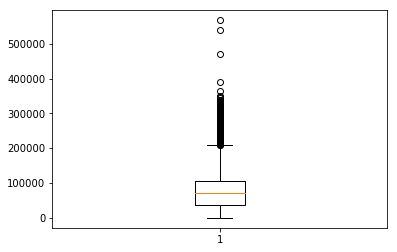

In [45]:
#on affiche un premier box-plot
plt.boxplot(frame_salaries["TotalPay"])

Joindre les deux dataframes de ventes en utilisant l’id.

In [46]:
frame_merge=pd.merge(frame_ventes,frame_excel1,left_index=True,right_index=False,
                     left_on=None, right_on="account")

In [47]:
frame_merge

,Jan,Feb,Mar,account,name,street,city,state,postal-code
0,10000,62000,35000,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752
1,95000,45000,35000,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365
2,91000,120000,35000,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517
3,45000,120000,10000,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021
4,162000,120000,35000,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681
5,150000,120000,35000,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785
6,62000,120000,70000,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008
7,145000,95000,35000,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461
8,70000,95000,35000,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415
9,70000,120000,35000,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308


In [161]:
frame_ventes

,Jan,Feb,Mar
account,,,
211829,10000,62000,35000
320563,95000,45000,35000
648336,91000,120000,35000
109996,45000,120000,10000
121213,162000,120000,35000
132971,150000,120000,35000
145068,62000,120000,70000
205217,145000,95000,35000
209744,70000,95000,35000


In [48]:
#salariés ayant le même nom
frame_salaries[frame_salaries.duplicated("EmployeeName")]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JOB
43,44,MICHAEL THOMPSON,FIREFIGHTER,123013,111730,15575.3,,250317.93,250317.93,2011,,San Francisco,,FIREFIGHTER
359,360,JOHN MURPHY,"LIEUTENANT, FIRE DEPARTMENT",123105,54870.8,15365.2,,193341.05,193341.05,2011,,San Francisco,,"LIEUTENANT, FIRE DEPARTMENT"
435,436,WILLIAM MCFARLAND,"LIEUTENANT, FIRE DEPARTMENT",123105,50096.3,15549,,188750.29,188750.29,2011,,San Francisco,,"LIEUTENANT, FIRE DEPARTMENT"
847,848,SANDRA TONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140547,20407.8,13637.7,,174592.38,174592.38,2011,,San Francisco,,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
864,865,WILLIAM LEE,DEPUTY DIRECTOR IV,174229,0,0,,174229.44,174229.44,2011,,San Francisco,,DEPUTY DIRECTOR IV
873,874,MICHAEL ELLIS,POLICE OFFICER II,109749,33568.4,30837.8,,174155.24,174155.24,2011,,San Francisco,,POLICE OFFICER II
915,916,MICHAEL COLEMAN,FIREFIGHTER,105935,50587.3,15830.3,,172352.25,172352.25,2011,,San Francisco,,FIREFIGHTER
937,938,HENRY YEE,POLICE OFFICER III,112421,19964.2,39230.6,,171616.25,171616.25,2011,,San Francisco,,POLICE OFFICER III
1134,1135,ANA GONZALEZ,"HEAD ATTORNEY, CIVIL AND CRIMINAL",166499,0,0,,166498.83,166498.83,2011,,San Francisco,,"HEAD ATTORNEY, CIVIL AND CRIMINAL"
1202,1203,DENIS BOUVIER,PHYSICIAN SPECIALIST,165104,0,0,,165104.40,165104.40,2011,,San Francisco,,PHYSICIAN SPECIALIST


In [49]:
#dataframe avec une seule occurence de chaque nom
frame_salaries.drop_duplicates("EmployeeName").shape

(110811, 14)

In [50]:
Series_count=frame_salaries["EmployeeName"].value_counts()

In [51]:
Series_count[Series_count==2]

Edward Smith                     2
Clifton E Raynor                 2
Elena Cahill                     2
Serena M Maguire Yazdani         2
Karen L Cai                      2
Crispin O Angeles                2
Michelle R Hooker                2
Brenda A Peralta                 2
Karen M Thomson                  2
ELLSWORTH JENNISON JR            2
Eddy Ortega                      2
Zaldy R Ralleta                  2
Janette S Prugh                  2
Gerald S Thompson                2
Julie Ansell                     2
Myda M Trinidad                  2
Bernard A Artificio              2
Kenneth M Christy                2
Karen Triandafyllis              2
Kee Chow                         2
John Lam                         2
Kira L Inglis                    2
Roberto Nolasco                  2
Terefe W Zeleke                  2
Gary Espina                      2
Jewell Weaver                    2
Renita N Livolsi                 2
Rachel A Marcic                  2
Candace A Sue       

In [52]:
#on discrétise une variable par intervalles égaux
frame_salaries["TotalPayDisc"]=pd.cut(frame_salaries["TotalPay"],5)

In [53]:
frame_salaries["TotalPayDisc"].value_counts()

(-1186.344, 113024.582]     116422
(113024.582, 226667.294]     31558
(226667.294, 340310.006]       666
(340310.006, 453952.718]         5
(453952.718, 567595.43]          3
Name: TotalPayDisc, dtype: int64

In [54]:
frame_salaries["TotalPayDisc2"]=pd.cut(frame_salaries["TotalPay"],[frame_salaries["TotalPay"].min(),
                                                                  frame_salaries["TotalPay"].median(),
                                                                  frame_salaries["TotalPay"].max()])

In [55]:
frame_salaries["TotalPayDisc2"].value_counts()

(71426.61, 567595.43]    74327
(-618.13, 71426.61]      74326
Name: TotalPayDisc2, dtype: int64

In [56]:
frame_salaries["TotalPayDisc3"]=pd.qcut(frame_salaries["TotalPay"],5)

In [57]:
frame_salaries["TotalPayDisc3"].value_counts()

(116203.934, 567595.43]    29731
(82593.838, 116203.934]    29731
(22559.132, 60703.398]     29731
[-618.13, 22559.132]       29731
(60703.398, 82593.838]     29730
Name: TotalPayDisc3, dtype: int64

In [58]:
#on utilise un groupby par JOB
group_salaries=frame_salaries.groupby("JOB")

In [59]:
#on affiche des stats
group_salaries["TotalPay"].agg(['mean','std','median','max','min'])

,mean,std,median,max,min
JOB,,,,,
ACCOUNT CLERK,43009.395299,17090.350131,50401.800,64275.68,0.00
ACCOUNTANT,47429.268000,27137.331315,60076.240,65392.01,1148.40
ACCOUNTANT I,62036.101250,17287.340334,67403.330,71605.00,19919.23
ACCOUNTANT II,67355.202699,13312.000618,69386.660,82553.67,1667.40
ACCOUNTANT III,79001.071547,23223.055629,89570.445,103766.03,198.07
ACCOUNTANT INTERN,37291.874167,19414.955624,49431.640,64629.68,1639.34
ACCOUNTANT IV,93217.791170,28613.360918,103766.020,119516.19,7957.72
"ACPO,JUVP, JUV PROB (SFERS)",62290.780000,NaN,62290.780,62290.78,62290.78
ACUPUNCTURIST,73922.225000,5304.086280,74299.750,79495.00,67594.40
